In [18]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

Data preparation

In [2]:
# Load Data Set
df = pd.read_csv(r'./data/train.csv', index_col='PassengerId')
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [3]:
# Drop non information columns
df.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
486,0,3,female,NaN,3,1,25.4667
333,0,1,male,38.0,0,1,153.4625
413,1,1,female,33.0,1,0,90.0000
519,1,2,female,36.0,1,0,26.0000
490,1,3,male,9.0,1,1,15.9000


In [4]:
df.shape

(891, 7)

In [5]:
# Drop null elements
df = df.dropna()

In [6]:
# Replase string value
df = df.replace({"male": 1, "female": 0})
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
873,0,1,1,33.0,0,0,5.0000
59,1,2,0,5.0,1,2,27.7500
606,0,3,1,36.0,1,0,15.5500
663,0,1,1,47.0,0,0,25.5875
572,1,1,0,53.0,2,0,51.4792


In [7]:
df.shape

(714, 7)

In [8]:
# Get purpose of learning
y = df["Survived"]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 714, dtype: int64

In [9]:
# Get data for learning
x = df.iloc[:, 1:]  # first parameter - rows - all, second parameter - columns - witout first
x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,3,0,39.0,0,5,29.1250
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000


In [11]:
# Get Y and X nparray
y = np.array(y)
x = np.array(x)

In [12]:
# Get train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [16]:
# Classifier
np.random.seed(42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'], # Макс кол-во признаков в листе
             'ccp_alpha': [0.1, .01, .001], # Внутренняя подстройка параметров
             'max_depth': [2, 3], # Макс глубина дерева
             'criterion': ['gini', 'entropy'] # Какие-то критерии
             }
dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)
best_dec_tree = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [19]:
score = accuracy_score(y_test, best_dec_tree.predict(x_test))
print("accuracy:", score)

accuracy: 0.7622377622377622


[Text(306.90000000000003, 570.7800000000001, 'Sex <= 0.5\ngini = 0.474\nsamples = 571\nvalue = [351, 220]'),
 Text(167.4, 407.70000000000005, 'Parch <= 3.5\ngini = 0.381\nsamples = 203\nvalue = [52, 151]'),
 Text(111.60000000000001, 244.62, 'Fare <= 36.688\ngini = 0.363\nsamples = 197\nvalue = [47, 150]'),
 Text(55.800000000000004, 81.53999999999996, 'gini = 0.446\nsamples = 131\nvalue = [44, 87]'),
 Text(167.4, 81.53999999999996, 'gini = 0.087\nsamples = 66\nvalue = [3, 63]'),
 Text(223.20000000000002, 244.62, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(446.40000000000003, 407.70000000000005, 'Parch <= 0.5\ngini = 0.305\nsamples = 368\nvalue = [299, 69]'),
 Text(334.8, 244.62, 'Age <= 25.5\ngini = 0.277\nsamples = 301\nvalue = [251, 50]'),
 Text(279.0, 81.53999999999996, 'gini = 0.158\nsamples = 104\nvalue = [95, 9]'),
 Text(390.6, 81.53999999999996, 'gini = 0.33\nsamples = 197\nvalue = [156, 41]'),
 Text(558.0, 244.62, 'Age <= 12.5\ngini = 0.406\nsamples = 67\nvalue = [48, 19

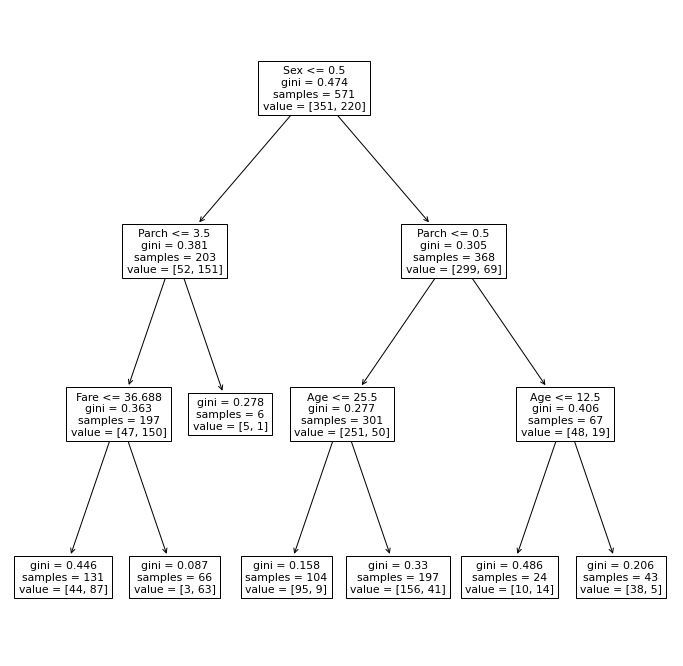

In [21]:
plt.figure(figsize=(12,12))
tree.plot_tree(best_dec_tree, feature_names=df.columns[1:])